<a href="https://colab.research.google.com/github/diegomarlop/LAB_IRONHACK/blob/main/Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lab | Customer Analysis Round 6

For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.

Get the data

We are using the marketing_customer_analysis.csv file.

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
#import matplotlib.pylot as plt

In [2]:
data = pd.read_csv('marketing_customer_analysis.csv')

### Dealing with the data 

In [3]:
def clean_headers(x):
  x.columns= [i.lower().replace(' ','_')  for i in x.columns]
  x['effective_to_date']=pd.to_datetime(x['effective_to_date'],errors='coerce')
  return x


In [4]:
clean_headers(data)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

### Explore the data

In [6]:
data.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [7]:
data_num=data.select_dtypes(include=np.number)
data_cat=data.select_dtypes(include=np.object)

In [8]:
data_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


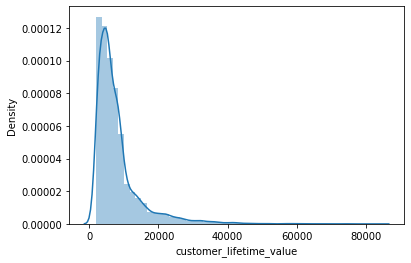

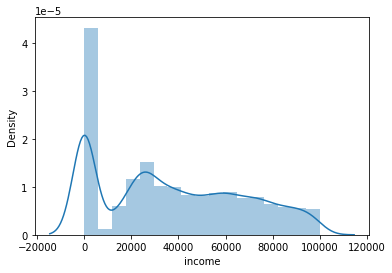

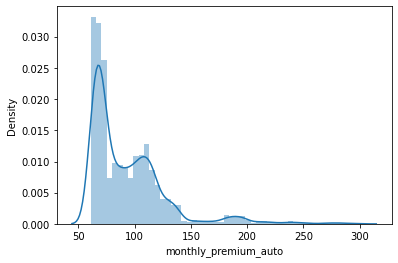

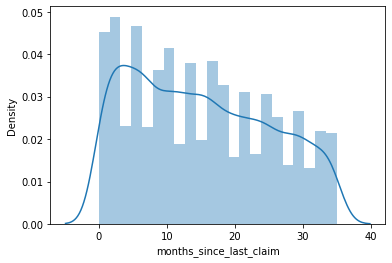

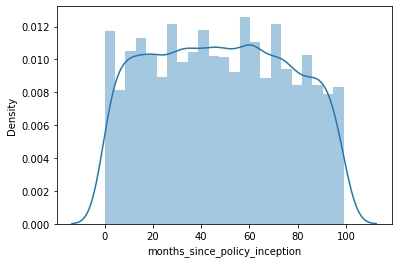

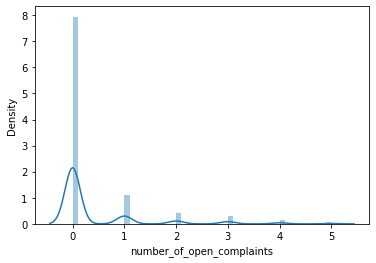

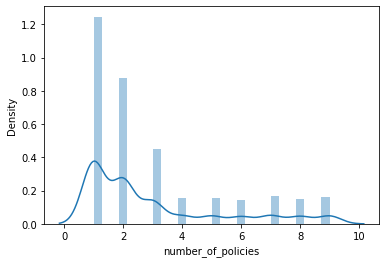

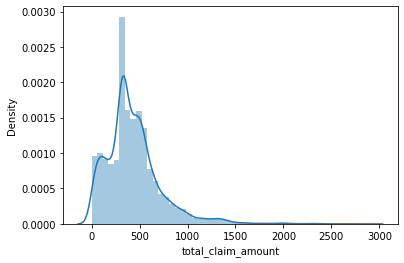

In [9]:
#vemos la distribución que tiene el data numerico 
for i in range(len(data_num.columns)):
  sns.distplot(data_num.iloc[:,i])
  plt.show()

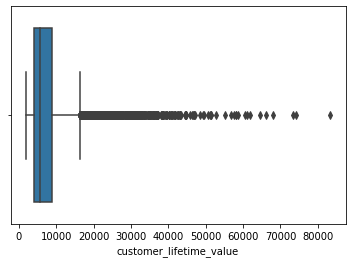

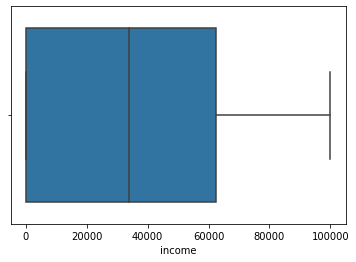

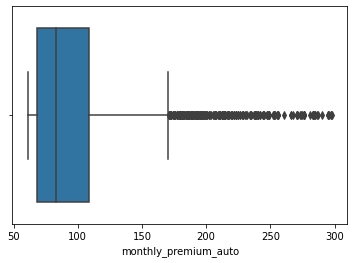

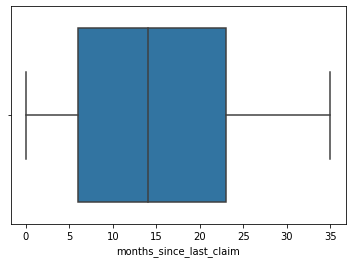

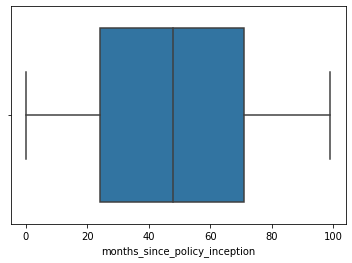

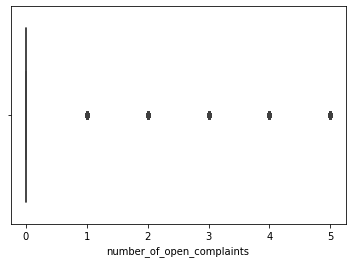

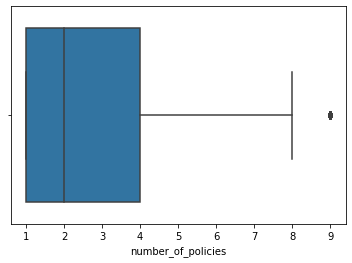

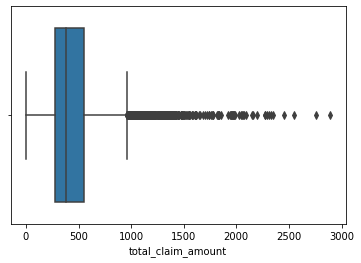

In [10]:
for i in range(len(data_num.columns)):
  sns.boxplot(data_num.iloc[:,i])
  plt.show()

### Processing Data
(Further processing...)

X-y split. (done)

Normalize (numerical). (done)

One Hot/Label Encoding (categorical).

Concat DataFrames

In [11]:
#X-y split 
y=data['total_claim_amount']
X=data.drop('total_claim_amount',axis=1)

In [12]:
X_num=X.select_dtypes(include=np.number)
X_cat=X.select_dtypes(include=np.object)

In [13]:
#Standarize 
from sklearn.preprocessing import StandardScaler
transformer=StandardScaler().fit(X_num)
x_stan=transformer.transform(X_num)

In [14]:
x_stan

array([[-0.76287773,  0.61282744, -0.70392465, ..., -1.54328695,
        -0.42224956, -0.82264788],
       [-0.14924546, -1.23961684,  0.02269103, ..., -0.21733419,
        -0.42224956,  2.10615996],
       [ 0.71063622,  0.36570978,  0.42959581, ..., -0.36068043,
        -0.42224956, -0.40424676],
       ...,
       [ 0.02313483, -1.23961684, -0.23889062, ..., -0.39651699,
         2.87324529, -0.40424676],
       [-0.06993547, -0.51735647,  0.08082028, ..., -1.61496007,
        -0.42224956,  0.01415436],
       [-0.78495478, -1.23961684, -0.47140763, ...,  1.50282075,
        -0.42224956, -0.82264788]])

In [13]:
#Normalize
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(X_num)
X_norm = transformer.transform(X_num)
X_norm_df=pd.DataFrame(X_norm)

In [14]:
X_norm

array([[4.90491254e-02, 9.98795451e-01, 1.22466656e-03, ...,
        8.87439538e-05, 0.00000000e+00, 1.77487908e-05],
       [9.99888829e-01, 0.00000000e+00, 1.34664469e-02, ...,
        6.01692310e-03, 0.00000000e+00, 1.14608059e-03],
       [2.55493903e-01, 9.66807936e-01, 2.14110479e-03, ...,
        7.53351684e-04, 0.00000000e+00, 3.96500886e-05],
       ...,
       [9.99934829e-01, 0.00000000e+00, 1.04110242e-02, ...,
        4.53185758e-03, 3.67447912e-04, 2.44965274e-04],
       [3.24391165e-01, 9.45912819e-01, 4.13871886e-03, ...,
        1.29334965e-04, 0.00000000e+00, 1.29334965e-04],
       [9.98972589e-01, 0.00000000e+00, 2.94508782e-02, ...,
        3.44231043e-02, 0.00000000e+00, 3.82478937e-04]])

In [15]:
X_norm_df

,0,1,2,3,4,5,6
0,0.049049,0.998795,0.001225,0.000568,0.000089,0.000000,0.000018
1,0.999889,0.000000,0.013466,0.001862,0.006017,0.000000,0.001146
2,0.255494,0.966808,0.002141,0.000357,0.000753,0.000000,0.000040
3,0.999865,0.000000,0.013862,0.002354,0.008500,0.000000,0.000915
4,0.064055,0.997944,0.001662,0.000273,0.001002,0.000000,0.000023
...,...,...,...,...,...,...,...
9129,0.309387,0.950935,0.000965,0.000238,0.001176,0.000000,0.000026
9130,0.141879,0.989876,0.003620,0.000641,0.001283,0.000000,0.000046
9131,0.999935,0.000000,0.010411,0.001102,0.004532,0.000367,0.000245
9132,0.324391,0.945913,0.004139,0.001466,0.000129,0.000000,0.000129


In [51]:
#OneHot!
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(drop='first').fit(X_cat)
encoder=encoder.transform(X_cat).toarray()
encoder

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [15]:
#LabelEncoding
#En este caso se ocupo un OrdinalEncoder ya que el label encoding solo acepta un vector 
from sklearn import preprocessing
labels=preprocessing.OrdinalEncoder().fit(X_cat).transform(X_cat)
labels

array([[6.000e+02, 4.000e+00, 0.000e+00, ..., 0.000e+00, 5.000e+00,
        1.000e+00],
       [5.946e+03, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [9.600e+01, 2.000e+00, 0.000e+00, ..., 0.000e+00, 5.000e+00,
        1.000e+00],
       ...,
       [6.688e+03, 1.000e+00, 0.000e+00, ..., 1.000e+00, 0.000e+00,
        1.000e+00],
       [7.214e+03, 1.000e+00, 0.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [8.434e+03, 1.000e+00, 0.000e+00, ..., 2.000e+00, 5.000e+00,
        1.000e+00]])

In [16]:
#Concatenar
X=np.concatenate((x_stan,labels),axis=1)

In [17]:
X

array([[-0.76287773,  0.61282744, -0.70392465, ...,  0.        ,
         5.        ,  1.        ],
       [-0.14924546, -1.23961684,  0.02269103, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.71063622,  0.36570978,  0.42959581, ...,  0.        ,
         5.        ,  1.        ],
       ...,
       [ 0.02313483, -1.23961684, -0.23889062, ...,  1.        ,
         0.        ,  1.        ],
       [-0.06993547, -0.51735647,  0.08082028, ...,  1.        ,
         0.        ,  0.        ],
       [-0.78495478, -1.23961684, -0.47140763, ...,  2.        ,
         5.        ,  1.        ]])

### Linear Regression
Train-test split.

Apply linear regression.

In [18]:
#Train test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)


In [19]:
#Linear regression
from sklearn import linear_model
lm=linear_model.LinearRegression()

model=lm.fit(X_train,y_train)

In [20]:
predictions=lm.predict(X_test)

In [21]:
predictions[:10]

array([281.19008077, 302.99220123, 452.64933811, 667.42851083,
       351.87621176, 234.83491781, 398.05222619, 457.11350678,
       541.33268455, 784.87486878])

In [22]:
y_test[:10]

7579     27.031485
5061    302.400000
2308    275.577631
3631    419.750892
2114    511.200000
4389    162.199584
8059    499.200000
4958    602.911057
4936    708.693556
5694    628.800000
Name: total_claim_amount, dtype: float64

### Model Validation
Description:

R2.

MSE.

RMSE.

MAE.

In [23]:
#VAlidation
#cambiamos de normalizer por standarize y se acerco la predicción más a 0.6 
from sklearn.metrics import mean_squared_error, r2_score
r2_score(y_test,predictions)

0.5989286716870118

In [25]:
#MAE
import sklearn.metrics as metrics
metrics.mean_absolute_error(y_test,predictions)

135.29431237836368

In [28]:
#MSE
mse =mean_squared_error(y_test,predictions)
mse

35090.34544585126

In [29]:
#RMSE
np.sqrt(mse)

187.32417208105113